# Machine Learning Homework 02 – Linear Classifier Implementation

## Implementation

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import OneHotEncoder
import seaborn
import matplotlib.pyplot as plt

In [2]:
def linear_regression_train(x, y):
    x_pinv = np.linalg.pinv(x)
    weights = np.matmul(x_pinv, y)
    return weights

def linear_regression_predict(weights, x):
    weights = np.transpose(weights)
    y_hat = np.matmul(weights, x)
    return y_hat

In [ ]:
coded_iris_labels = {'setosa': np.array([1,0,0]), 'versicolor': np.array([0,1,0]), 'virginica': np.array([0,0,1])}
index_iris_labels = {'setosa': 0, 'versicolor': 1, 'virginica': 2}


def multiclass_perceptron_train_iris(x_train, y_train, num_iters=10000, lr=0.01, regression_init=True):
    one_hot_indices = {0: [1,0,0], 1: [0,1,0], 2: [0,0,1]}
    labels = set(y_train)
    df_by_label = []
    weights_by_label = []
    total = pd.concat([x_train, y_train], axis=1, sort=False)
    x_array = x_train.to_numpy()
    y_array = np.array([coded_iris_labels[x] for x in y_train.to_numpy()])
    y_array_indices = np.array([index_iris_labels[x] for x in y_train.to_numpy()])

    for x, y in total.groupby('species'):
        df_by_label.append(y)
        
    if regression_init:
        for i in range(len(labels)):
            xi_train = df_by_label[i].drop(columns='species')
            yi_train = df_by_label[i]['species']
            xi_array = xi_train.to_numpy()
            yi_array = np.array([coded_iris_labels[x] for x in yi_train.to_numpy()])
            _weights = linear_regression_train(xi_array, yi_array)
            weights = [x[i] for x in _weights]
            weights_by_label.append(np.array(weights))
    else:
        #df = [x.drop['species'] for x in df_by_label]
        for x in df_by_label:
            x = x.drop(columns='species')
            weights_by_label.append(x.to_numpy()[0])
        #for x in df:
         #   weights_by_label.append(x.to_numpy()[0])
    accuracy_per_iter = []
    for j in range(num_iters):
        accuracy_count = len(y_train)
        for i in range(len(y_train)):
            computed_y = [np.dot(x_array[i].T, k) for k in weights_by_label]
            y_predict = computed_y.index(max(computed_y))
            if y_predict != y_array_indices[i]:
                weights_by_label[y_predict] -= lr * x_array[i].T
                weights_by_label[y_array_indices[i]] += lr* x_array[i].T
                accuracy_count -= 1
        accuracy_per_iter.append(accuracy_count/len(y_train))
    
    return (weights_by_label, accuracy_per_iter)


def multiclass_perceptron_test_iris(weights_by_label, x_test, y_test):
    predictions = []
    correct_count = 0
    x_array = x_test.to_numpy()
    y_array = np.array([coded_iris_labels[x] for x in y_test.to_numpy()])
    y_array_indices = np.array([index_iris_labels[x] for x in y_test.to_numpy()])
    for i in range(len(y_test)):
        computed_y = [np.dot(x_array[i].T, j) for j in weights_by_label]
        y_predict = computed_y.index(max(computed_y))
        y_actual = y_array_indices[i]
        predictions.append((y_predict, y_actual))
        if y_predict == y_actual:
            correct_count += 1
    accuracy = correct_count / len(y_test)
    return predictions, accuracy

In [ ]:
def perceptron(x_train, y_train, num_iters = 10000, lr=0.01, regression_init=True):
    x_array = x_train.to_numpy()
    y_array = y_train.to_numpy()
    if regression_init:
        weights = linear_regression_train(x_array, y_array)
    else:
        weights = x_array[0]
    accuracy_per_iter = []
    for j in range(num_iters):
        accuracy_count = len(y_train)
        for i in range(len(y_train)):
            computed_y = np.dot(x_array[i].T, weights)
            y_predict = 1 if computed_y >= 0.0 else 0
            if y_predict != y_array[i]:
                if computed_y < y_array[i]:
                    weights += lr * x_array[i].T
                if computed_y > y_array[i]:
                    weights -= lr * x_array[i].T
                accuracy_count -= 1
        accuracy_per_iter.append(accuracy_count/len(y_train))
    return (weights, accuracy_per_iter)


coded_bc_labels = {0: np.array([1,0]), 1: np.array([0,1])}

def multiclass_perceptron_test_bc(weights, x_test, y_test):
    predictions = []
    correct_count = 0
    x_array = x_test.to_numpy()
    y_array = y_test.to_numpy()
    for i in range(len(y_test)):
        computed_y = np.dot(x_array[i].T, weights)
        y_predict = 1 if computed_y >= 0.0 else 0
        y_actual = y_array[i]
        predictions.append((computed_y, y_actual))
        if y_predict == y_actual:
            correct_count += 1
    accuracy = correct_count / len(y_test)
    return predictions, accuracy

## Experiments

In [ ]:
# pandas dataframes – iris
iris_df = seaborn.load_dataset('iris')
iris_features = iris_df.drop(columns='species')
iris_labels_str = iris_df['species']
iris_df['species'] = iris_df['species'].astype('category').cat.codes
iris_labels = iris_df['species']

In [ ]:
iris_errors_lr = []
iris_accuracies_lr = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_labels_str, test_size = 0.2)
    w_iris, iris_accuracy_list = multiclass_perceptron_train_iris(x_train, y_train)
    predictions_iris, iris_accuracy_number = multiclass_perceptron_test_iris(w_iris, x_test, y_test)
    iris_accuracies_lr.append(iris_accuracy_number)
    iris_errors_lr.append(iris_accuracy_list)

In [ ]:
iris_errors_fv = []
iris_accuracies_fv = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_labels_str, test_size = 0.2)
    w_iris, iris_accuracy_list = multiclass_perceptron_train_iris(x_train, y_train, regression_init=False)
    predictions_iris, iris_accuracy_number = multiclass_perceptron_test_iris(w_iris, x_test, y_test)
    iris_accuracies_fv.append(iris_accuracy_number)
    iris_errors_fv.append(iris_accuracy_list)

In [ ]:
plt.title('predictive accuracy of multiclass perceptron on iris dataset')
plt.xlabel('sample index')
plt.ylabel('accuracy')
plt.plot([i for i in range(5)], iris_accuracies_lr, label = 'linear regression initialization')
plt.plot([i for i in range(5)], iris_accuracies_fv, label = 'first-value initialization')
plt.legend()
plt.savefig('iris_accuracies.png')
plt.show()

In [ ]:
plt.title('accuracy of multiclass perceptron on iris dataset per iteration')
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.plot([i for i in range(10000)], iris_errors_lr[0], label='Accuracy per iteration - iris; linear regression')
plt.plot([i for i in range(10000)], iris_errors_fv[0], label='Accuracy per iteration - iris; first-value init')
plt.legend()
plt.savefig('iris_errors.png')
plt.show()

### Breast Cancer Experiment

In [ ]:
bc_errors_lr = []
bc_accuracies_lr = []
bc_df = load_breast_cancer(as_frame=True)
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(bc_df.data, bc_df.target, test_size=0.2)
    w_bc, bc_accuracy_list = perceptron(x_train, y_train, num_iters=10000, lr=0.1)
    predictions_bc, bc_accuracy_number = multiclass_perceptron_test_bc(w_bc, x_test, y_test)
    bc_accuracies_lr.append(bc_accuracy_number)
    bc_errors_lr.append(bc_accuracy_list)

In [ ]:
bc_errors_fv = []
bc_accuracies_fv = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(bc_df.data, bc_df.target, test_size=0.2)
    w_bc, bc_accuracy_list = perceptron(x_train, y_train, num_iters=10000, regression_init=False)
    predictions_bc, bc_accuracy_number = multiclass_perceptron_test_bc(w_bc, x_test, y_test)
    bc_accuracies_fv.append(bc_accuracy_number)
    bc_errors_fv.append(bc_accuracy_list)

In [ ]:
plt.title('predictive accuracy of multiclass perceptron on breast cancer dataset')
plt.xlabel('sample index')
plt.ylabel('accuracy')
plt.plot([i for i in range(5)], bc_accuracies_lr, label = 'linear regression initialization')
plt.plot([i for i in range(5)], bc_accuracies_fv, label = 'first-value initialization')
plt.legend()
plt.savefig('bc_accuracies.png')
plt.show()

In [ ]:
plt.title('accuracy of multiclass perceptron on breast cancer dataset per iteration')
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.plot([i for i in range(10000)], bc_errors_lr[0], label='linear regression initialization')
plt.plot([i for i in range(10000)], bc_errors_fv[0], label='first-value initialization')
plt.savefig('bc_errors.png')
plt.show()

In [ ]:
print(sum(bc_accuracies_lr)/5, sum(bc_accuracies_fv)/5)

In [ ]:
print(sum(iris_accuracies_lr)/5, sum(iris_accuracies_fv)/5)

In [ ]:
print(sum(bc_errors_lr[0])/len(bc_errors_lr[0]))

In [ ]:
print(sum(bc_errors_fv[0])/len(bc_errors_fv[0]))

In [ ]:
print(sum(iris_errors_lr[0])/len(iris_errors_lr[0]))

In [ ]:
print(sum(iris_errors_fv[0])/len(iris_errors_fv[0]))

In [4]:
def perceptron(x_train, y_train, num_iters = 10000, lr=0.01, regression_init=True):
    x_array = x_train.to_numpy()
    y_array = y_train.to_numpy()
    if regression_init:
        weights = linear_regression_train(x_array, y_array)
    else:
        weights = x_array[0]
    accuracy_per_iter = []
    for j in range(num_iters):
        accuracy_count = len(y_train)
        for i in range(len(y_train)):
            computed_y = np.dot(x_array[i].T, weights)
            y_predict = 1 if computed_y >= 0.0 else 0
            if y_predict != y_array[i]:
                if computed_y < y_array[i]:
                    weights += lr * x_array[i].T
                if computed_y > y_array[i]:
                    weights -= lr * x_array[i].T
                accuracy_count -= 1
        accuracy_per_iter.append(accuracy_count/len(y_train))
    return (weights, accuracy_per_iter)


coded_bc_labels = {0: np.array([1,0]), 1: np.array([0,1])}

def multiclass_perceptron_test_bc(weights, x_test, y_test):
    predictions = []
    correct_count = 0
    x_array = x_test.to_numpy()
    y_array = y_test.to_numpy()
    for i in range(len(y_test)):
        computed_y = np.dot(x_array[i].T, weights)
        y_predict = 1 if computed_y >= 0.0 else 0
        y_actual = y_array[i]
        predictions.append((computed_y, y_actual))
        if y_predict == y_actual:
            correct_count += 1
    accuracy = correct_count / len(y_test)
    return predictions, accuracy

## Experiments

In [5]:
# pandas dataframes – iris
iris_df = seaborn.load_dataset('iris')
iris_features = iris_df.drop(columns='species')
iris_labels_str = iris_df['species']
iris_df['species'] = iris_df['species'].astype('category').cat.codes
iris_labels = iris_df['species']

In [6]:
iris_errors_lr = []
iris_accuracies_lr = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_labels_str, test_size = 0.2)
    w_iris, iris_accuracy_list = multiclass_perceptron_train_iris(x_train, y_train)
    predictions_iris, iris_accuracy_number = multiclass_perceptron_test_iris(w_iris, x_test, y_test)
    iris_accuracies_lr.append(iris_accuracy_number)
    iris_errors_lr.append(iris_accuracy_list)

In [7]:
iris_errors_fv = []
iris_accuracies_fv = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_labels_str, test_size = 0.2)
    w_iris, iris_accuracy_list = multiclass_perceptron_train_iris(x_train, y_train, regression_init=False)
    predictions_iris, iris_accuracy_number = multiclass_perceptron_test_iris(w_iris, x_test, y_test)
    iris_accuracies_fv.append(iris_accuracy_number)
    iris_errors_fv.append(iris_accuracy_list)

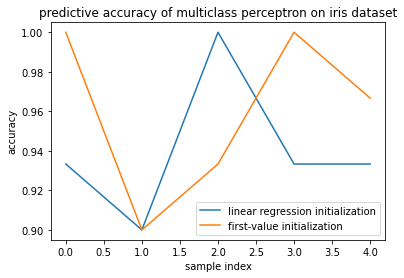

In [8]:
plt.title('predictive accuracy of multiclass perceptron on iris dataset')
plt.xlabel('sample index')
plt.ylabel('accuracy')
plt.plot([i for i in range(5)], iris_accuracies_lr, label = 'linear regression initialization')
plt.plot([i for i in range(5)], iris_accuracies_fv, label = 'first-value initialization')
plt.legend()
plt.savefig('iris_accuracies.png')
plt.show()

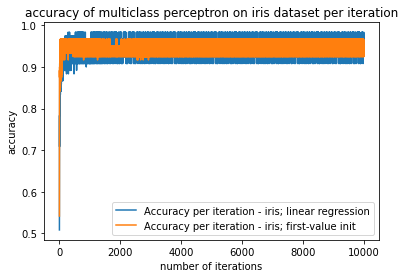

In [9]:
plt.title('accuracy of multiclass perceptron on iris dataset per iteration')
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.plot([i for i in range(10000)], iris_errors_lr[0], label='Accuracy per iteration - iris; linear regression')
plt.plot([i for i in range(10000)], iris_errors_fv[0], label='Accuracy per iteration - iris; first-value init')
plt.legend()
plt.savefig('iris_errors.png')
plt.show()

### Breast Cancer Experiment

In [10]:
bc_errors_lr = []
bc_accuracies_lr = []
bc_df = load_breast_cancer(as_frame=True)
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(bc_df.data, bc_df.target, test_size=0.2)
    w_bc, bc_accuracy_list = perceptron(x_train, y_train, num_iters=10000, lr=0.1)
    predictions_bc, bc_accuracy_number = multiclass_perceptron_test_bc(w_bc, x_test, y_test)
    bc_accuracies_lr.append(bc_accuracy_number)
    bc_errors_lr.append(bc_accuracy_list)

In [12]:
bc_errors_fv = []
bc_accuracies_fv = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(bc_df.data, bc_df.target, test_size=0.2)
    w_bc, bc_accuracy_list = perceptron(x_train, y_train, num_iters=10000, regression_init=False)
    predictions_bc, bc_accuracy_number = multiclass_perceptron_test_bc(w_bc, x_test, y_test)
    bc_accuracies_fv.append(bc_accuracy_number)
    bc_errors_fv.append(bc_accuracy_list)

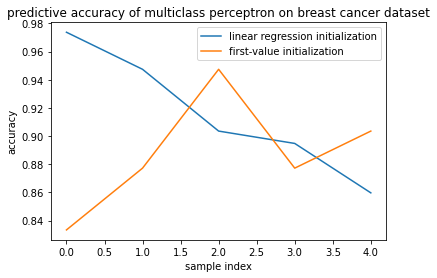

In [13]:
plt.title('predictive accuracy of multiclass perceptron on breast cancer dataset')
plt.xlabel('sample index')
plt.ylabel('accuracy')
plt.plot([i for i in range(5)], bc_accuracies_lr, label = 'linear regression initialization')
plt.plot([i for i in range(5)], bc_accuracies_fv, label = 'first-value initialization')
plt.legend()
plt.savefig('bc_accuracies.png')
plt.show()

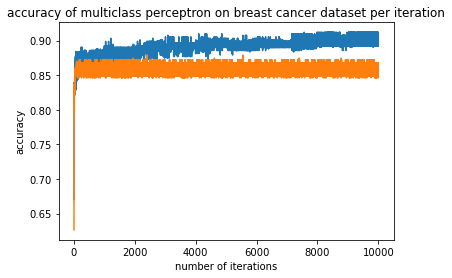

In [15]:
plt.title('accuracy of multiclass perceptron on breast cancer dataset per iteration')
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.plot([i for i in range(10000)], bc_errors_lr[0], label='linear regression initialization')
plt.plot([i for i in range(10000)], bc_errors_fv[0], label='first-value initialization')
plt.savefig('bc_errors.png')
plt.show()

In [18]:
print(sum(bc_accuracies_lr)/5, sum(bc_accuracies_fv)/5)

0.9157894736842106 0.887719298245614


In [19]:
print(sum(iris_accuracies_lr)/5, sum(iris_accuracies_fv)/5)

0.9400000000000001 0.96


In [23]:
print(sum(bc_errors_lr[0])/len(bc_errors_lr[0]))

0.8916643956042528


In [24]:
print(sum(bc_errors_fv[0])/len(bc_errors_fv[0]))

0.8593571428572583


In [25]:
print(sum(iris_errors_lr[0])/len(iris_errors_lr[0]))

0.9372675000000039


In [26]:
print(sum(iris_errors_fv[0])/len(iris_errors_fv[0]))

0.9455691666666344
